In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import string

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAVADEEP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAVADEEP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
train_df = pd.read_csv(r"D:\twitter_training.csv", header=None, names=["entity", "sentiment", "text"])
val_df = pd.read_csv(r"D:\twitter_validation.csv", header=None, names=["entity", "sentiment", "text"])
df = pd.concat([train_df, val_df], ignore_index=True)


In [4]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)
df.dropna(subset=["clean_text"], inplace=True)

C:\Users\NAVADEEP\AppData\Local\Temp\ipykernel_17048\1859803033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


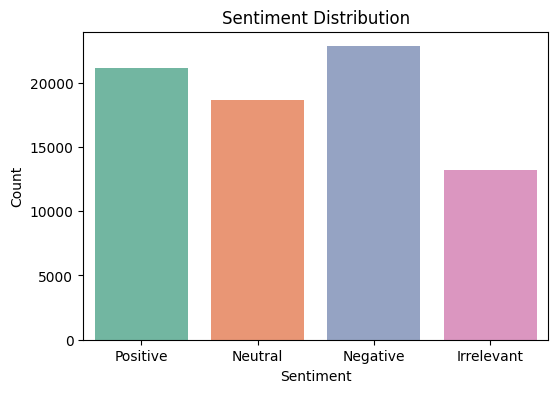

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [6]:
def generate_wordcloud(dataframe, sentiment_label):
    text = " ".join(dataframe[dataframe['sentiment'].str.lower() == sentiment_label.lower()]["clean_text"])
    if text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud for {sentiment_label} Tweets")
        plt.show()

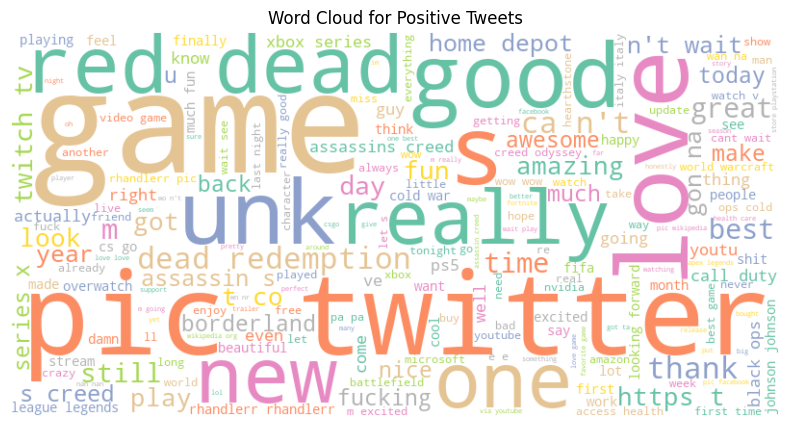

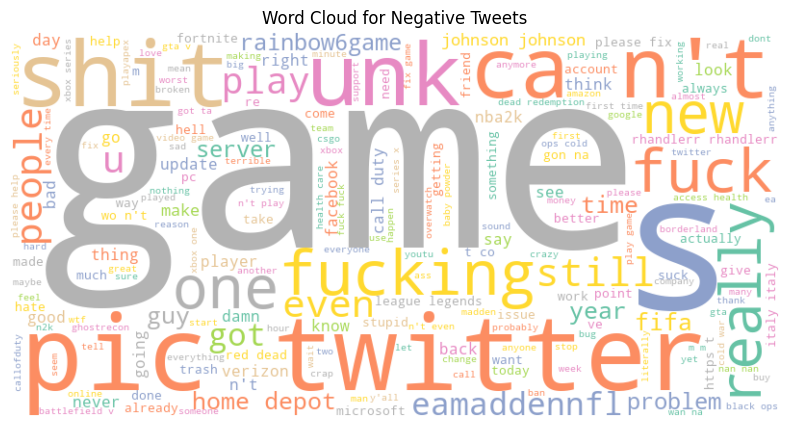

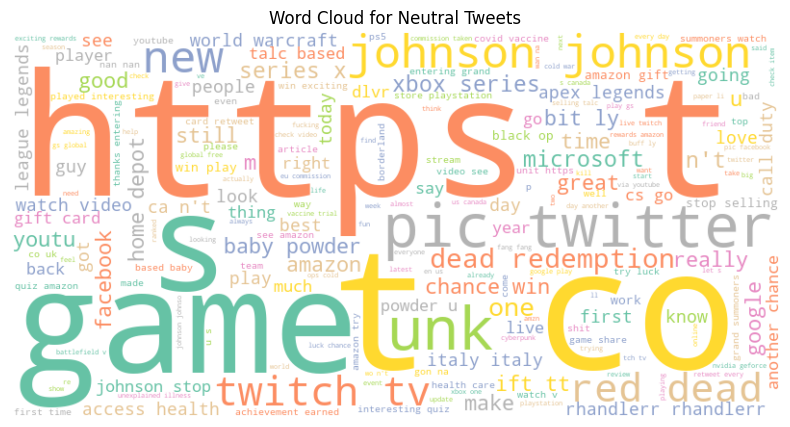

In [7]:
generate_wordcloud(df, "Positive")
generate_wordcloud(df, "Negative")
generate_wordcloud(df, "Neutral")

In [8]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["sentiment"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.6101605337913721

Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.65      0.31      0.42      2567
    Negative       0.61      0.77      0.68      4571
     Neutral       0.61      0.52      0.56      3790
    Positive       0.60      0.70      0.65      4209

    accuracy                           0.61     15137
   macro avg       0.62      0.58      0.58     15137
weighted avg       0.61      0.61      0.60     15137

